# Prac 2 - Supervised Machine Learning  
## Part 1: Decision Tree & Random Forest with Iris Dataset  

The **Iris dataset** is one of the most famous datasets in machine learning.  
It contains **150 samples** of iris flowers with 4 features:  
- Sepal Length  
- Sepal Width  
- Petal Length  
- Petal Width  

Each sample belongs to one of **three species**:  
- Iris Setosa  
- Iris Versicolor  
- Iris Virginica  

We will build **Decision Tree** and **Random Forest** classifiers to predict the species based on the features.

In [98]:
# Install missing package (works in Jupyter)
%pip install seaborn

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
iris = pd.read_csv("Iris.csv")

# Preview dataset
iris.head()

Note: you may need to restart the kernel to use updated packages.


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Visualization  
We will visualize the distribution of features and see how they separate the species.

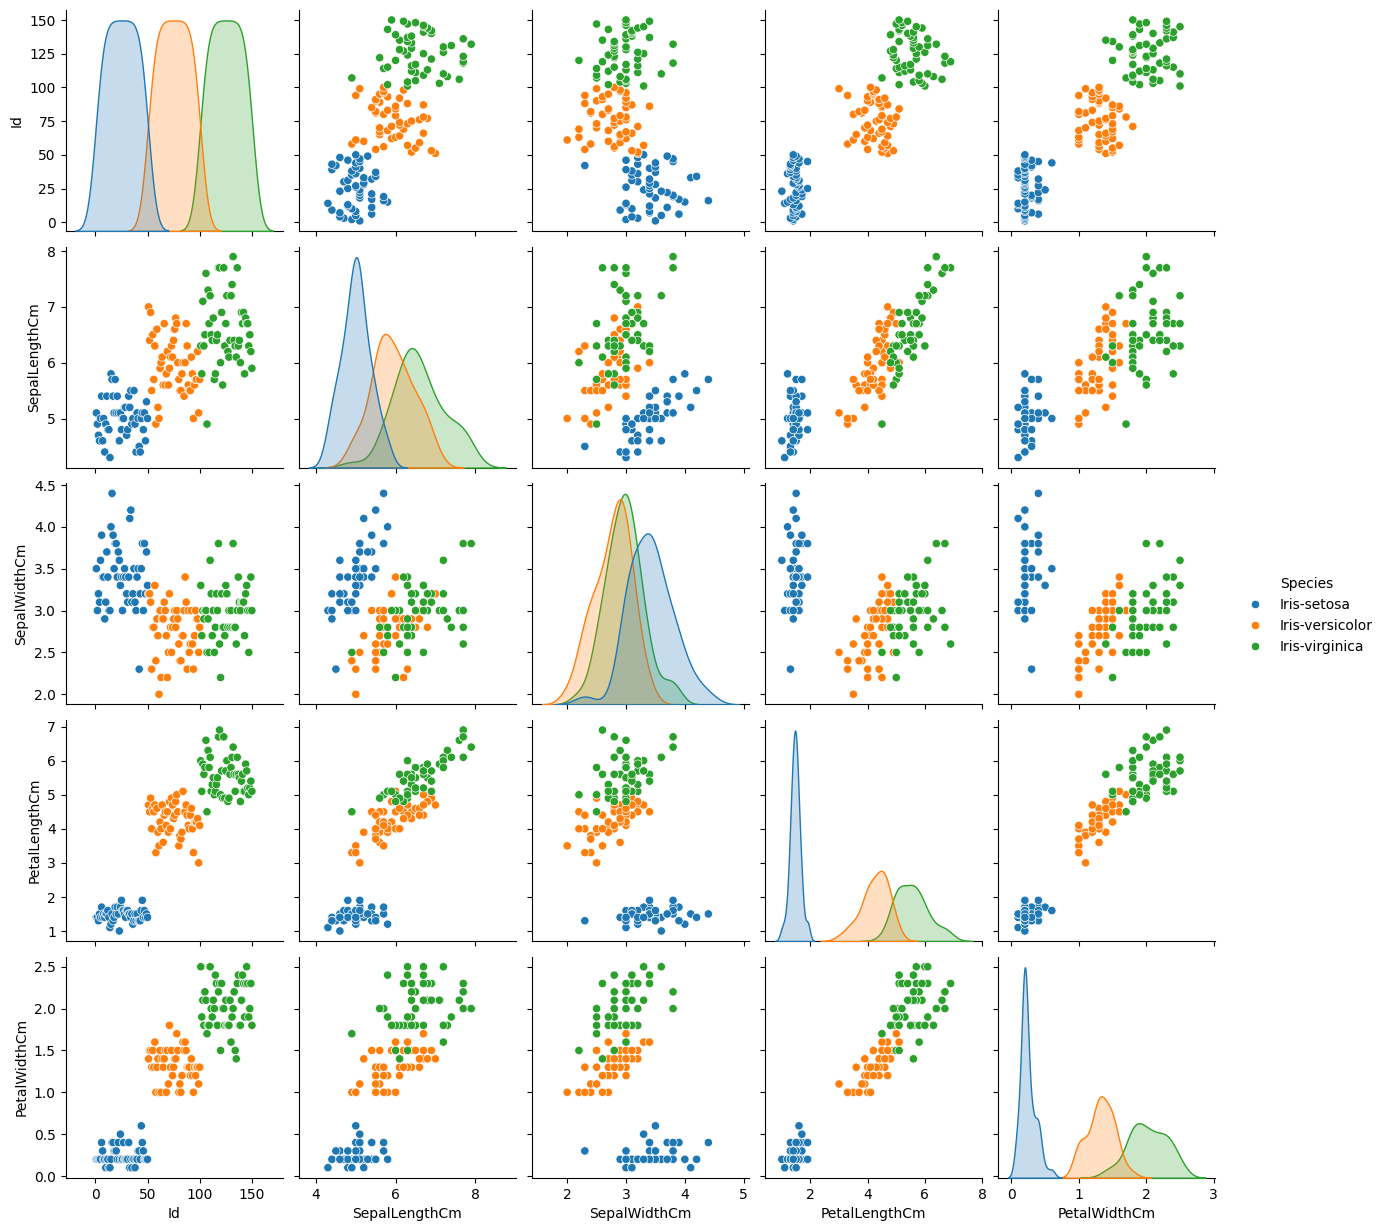

In [99]:
# Pairplot for visualization
sns.pairplot(iris, hue="Species", diag_kind="kde")
plt.show()

### Preparing Data  
We separate features (X) and target (y).

In [100]:
X = iris.drop(["Species", "Id"], axis=1)  # drop target + Id column if present
y = iris["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree Model

Decision Tree Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



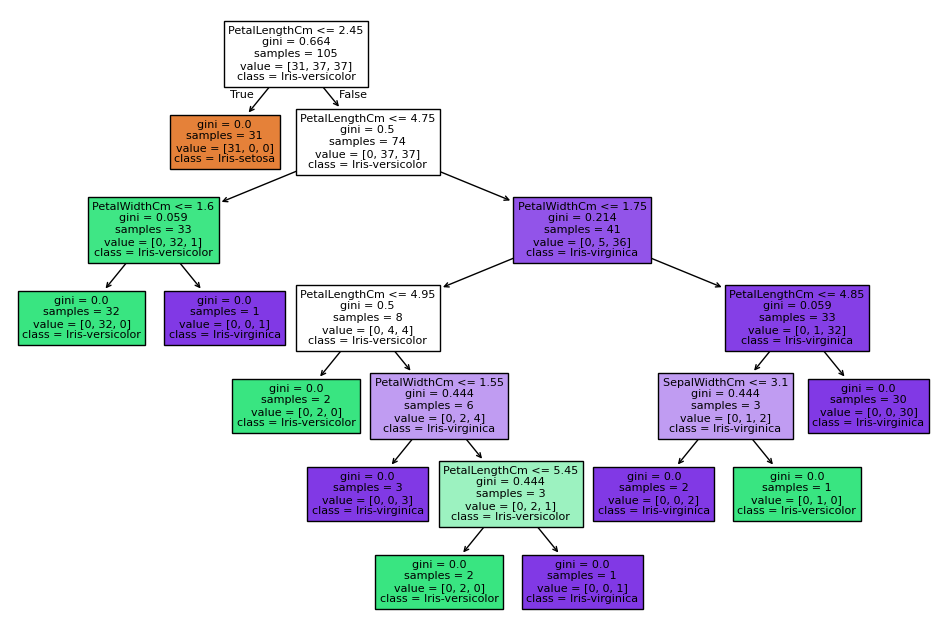

In [101]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Plot decision tree
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=X.columns, class_names=dt.classes_, filled=True)
plt.show()

### Random Forest Model

Random Forest Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



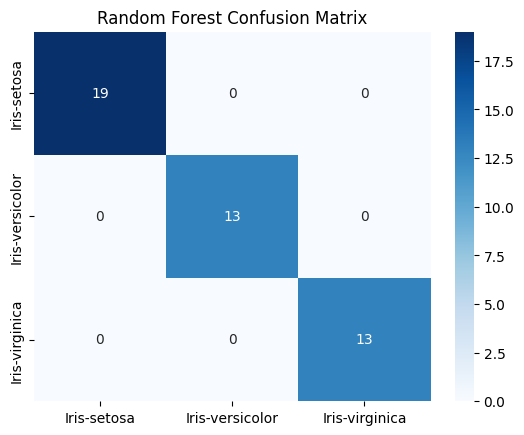

In [102]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", 
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Random Forest Confusion Matrix")
plt.show()

## Part 2: Linear Regression with Head-Brain Dataset  

This dataset explores the relationship between **Head Size (cm³)** and **Brain Weight (grams)**.  

- **Independent Variable (X):** Head Size  
- **Dependent Variable (y):** Brain Weight  

We will use **Linear Regression** to model how head size affects brain weight.


In [103]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
headbrain = pd.read_csv("headbrain.csv")
headbrain.head()


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### Data Exploration

In [104]:
print("Dataset Shape:", headbrain.shape)
print("Columns:", headbrain.columns)

# Basic statistics
headbrain.describe()

Dataset Shape: (237, 4)
Columns: Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


### Scatter Plot of Head Size vs Brain Weight  
This helps us visually check if there is a linear relationship.

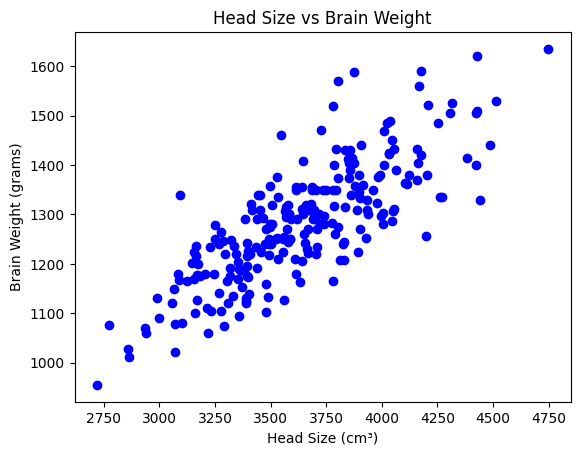

In [105]:
plt.scatter(headbrain["Head Size(cm^3)"], headbrain["Brain Weight(grams)"], color="blue")
plt.xlabel("Head Size (cm³)")
plt.ylabel("Brain Weight (grams)")
plt.title("Head Size vs Brain Weight")
plt.show()

### Linear Regression Model

In [106]:
X = headbrain[["Head Size(cm^3)"]]
y = headbrain["Brain Weight(grams)"]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Predictions
y_pred = lin_reg.predict(X)

print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_)
print("R2 Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

Intercept: 325.5734210494426
Coefficient: [0.26342934]
R2 Score: 0.639311719957
MSE: 5201.3840280023305


### Regression Line Visualization

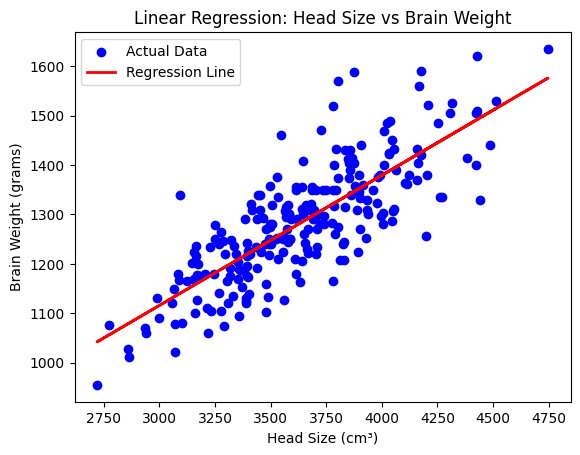

In [107]:
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Head Size (cm³)")
plt.ylabel("Brain Weight (grams)")
plt.title("Linear Regression: Head Size vs Brain Weight")
plt.legend()
plt.show()

# Prac 2 - Supervised Machine Learning  
## Part 3: Logistic Regression with Bank Dataset  

This dataset comes from a **bank marketing campaign**.  
The goal is to predict whether a client will **subscribe to a term deposit**.  

- **Target variable (y):** `y` (yes/no → 1/0)  
- **Independent variables (X):** Client and campaign features (age, job, marital, education, balance, etc.).  

We will build a **Logistic Regression classifier**.

In [108]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
bank = pd.read_csv("bank.csv")
bank.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Data Exploration

Dataset Shape: (41188, 21)
Columns: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')
y
0    36548
1     4640
Name: count, dtype: int64


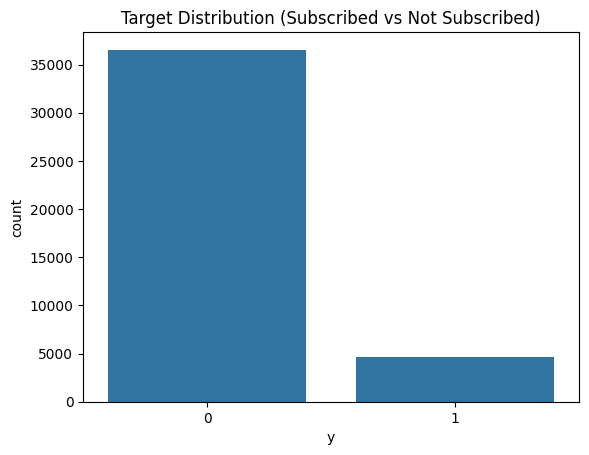

In [109]:
print("Dataset Shape:", bank.shape)
print("Columns:", bank.columns)

# Check class balance
print(bank["y"].value_counts())

sns.countplot(x="y", data=bank)
plt.title("Target Distribution (Subscribed vs Not Subscribed)")
plt.show()

### Data Preprocessing  
We will convert categorical variables into numerical using one-hot encoding (dummy variables).

In [110]:
# Encode categorical variables
bank_encoded = pd.get_dummies(bank, drop_first=True)

# Define features and target
# The original 'y' column is already numeric (0/1), so use 'y' instead of 'y_yes'
X = bank_encoded.drop("y", axis=1)
y = bank_encoded["y"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression Model

In [111]:
log_reg = LogisticRegression(max_iter=1000)  # increase max_iter for convergence
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9063688597556041

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10931
           1       0.64      0.42      0.51      1426

    accuracy                           0.91     12357
   macro avg       0.79      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



/home/lerato/ml_prac2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix Visualization

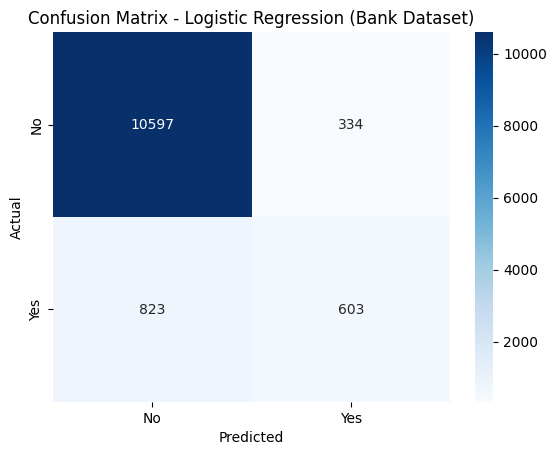

In [112]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Bank Dataset)")
plt.show()

## Part 4: K-Nearest Neighbours (KNN) with Diabetes Dataset  

The **Diabetes dataset** contains medical records of patients and indicates whether they are **diabetic (1)** or **non-diabetic (0)**.  

- **Target variable (y):** `Outcome` (0 = non-diabetic, 1 = diabetic)  
- **Independent variables (X):** Features like glucose level, blood pressure, BMI, age, etc.  

We will build a **KNN classifier** to predict diabetes.

In [113]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Exploration

Dataset Shape: (768, 9)
Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Outcome
0    500
1    268
Name: count, dtype: int64


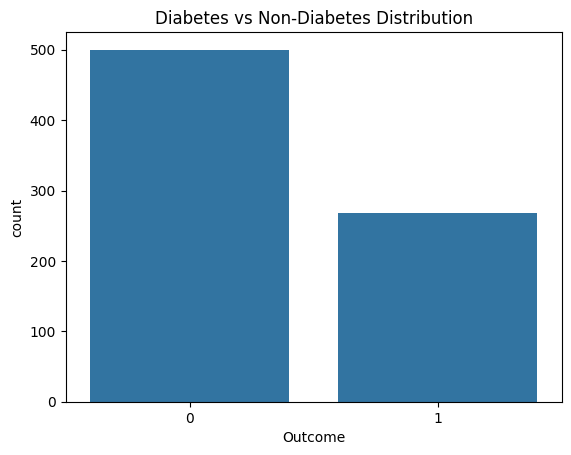

In [114]:
print("Dataset Shape:", diabetes.shape)
print("Columns:", diabetes.columns)
print(diabetes["Outcome"].value_counts())

sns.countplot(x="Outcome", data=diabetes)
plt.title("Diabetes vs Non-Diabetes Distribution")
plt.show()

### Feature Scaling  
KNN is distance-based, so we need to scale the features.

In [115]:
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### KNN Model Training

In [116]:
knn = KNeighborsClassifier(n_neighbors=5)  # default k=5
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.7012987012987013

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.57      0.54      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231



### Confusion Matrix Visualization

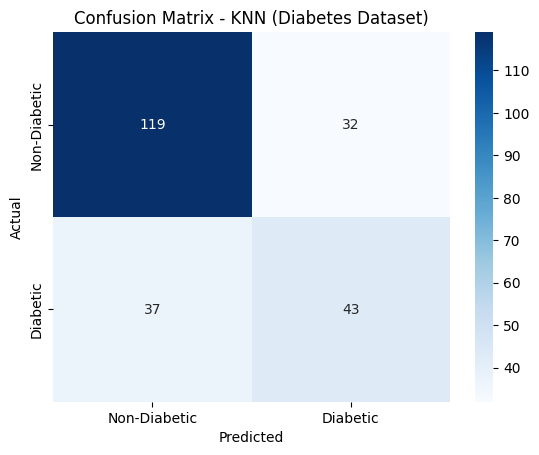

In [117]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (Diabetes Dataset)")
plt.show()

### Accuracy vs Different K Values
To see the effect of `k` on model performance, we will test multiple values.

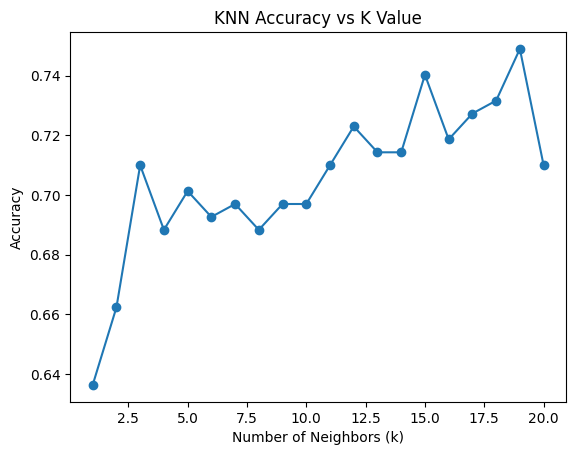

In [118]:
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 21), accuracies, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Value")
plt.show()

 ## Part 5: Naïve Bayes with Adult Dataset  

The **Adult dataset** contains information about individuals such as age, education, occupation, and more.  
The goal is to predict whether an individual’s **annual income exceeds $50K**.  

- **Target variable (y):** `income` (<=50K or >50K)  
- **Independent variables (X):** Features like age, education, occupation, marital status, etc.  

We will use **Gaussian Naïve Bayes** for classification.


In [119]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
adult = pd.read_csv("adult.csv")
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Data Exploration


Dataset Shape: (32561, 15)
Columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


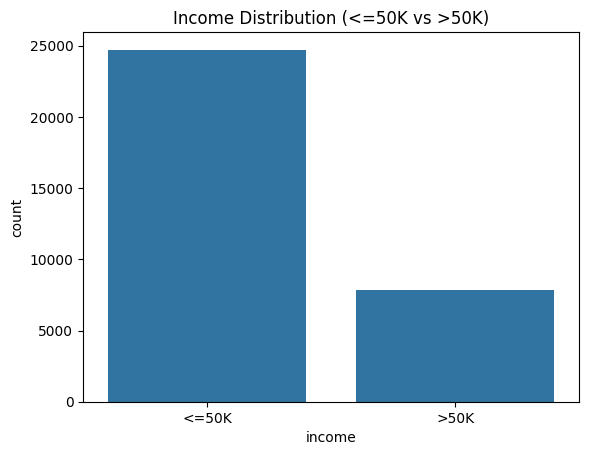

In [120]:
print("Dataset Shape:", adult.shape)
print("Columns:", adult.columns)
print(adult["income"].value_counts())

sns.countplot(x="income", data=adult)
plt.title("Income Distribution (<=50K vs >50K)")
plt.show()

### Data Preprocessing  
Convert categorical variables to numerical using **label encoding** or **one-hot encoding**.

In [121]:
# Encode categorical columns
categorical_cols = adult.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    adult[col] = le.fit_transform(adult[col])
    label_encoders[col] = le

# Features and target
X = adult.drop("income", axis=1)
y = adult["income"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Naïve Bayes Model

In [122]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Naïve Bayes Accuracy: 0.7957825775412017

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      7429
           1       0.65      0.31      0.42      2340

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



### Confusion Matrix Visualization

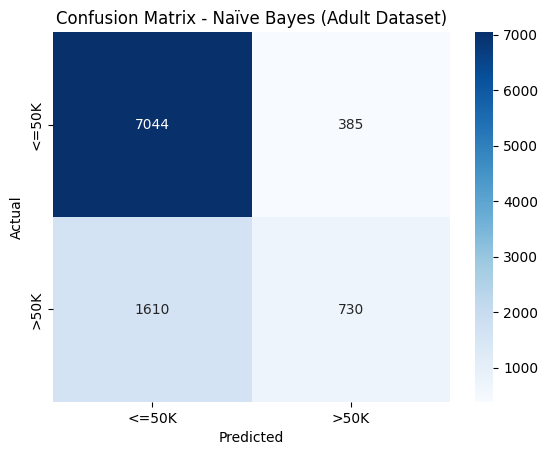

In [123]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes (Adult Dataset)")
plt.show()

## Conclusion

Parts 1–5 demonstrated how different supervised machine learning models can be applied to various datasets.  
Decision Tree, Random Forest, KNN, Logistic Regression, and Naïve Bayes all performed well for their respective classification or regression tasks.  
Proper preprocessing and visualization helped improve understanding and model accuracy. Overall, choosing the right algorithm and preparing the data carefully are key to building effective predictive models.
